## Fuel Efficiency Analysis - Model Development

### Author: Marzieh Safari

#### Objectives:
* Identify the contributing factors on the fuel efficiency
* Model Development for EPA prediction fuel and total actual fuel consumption, indicating fuel efficiency (One independent variable)
* Model Development for EPA predication fuel based on other contributing factors, indicating fuel efficiency (Multiple independent variables) 
* Model Evaluation and Refinement

#### Source of Data:
* <a href="https://data.cityofnewyork.us/Environment/Real-World-Fuel-Efficiency/mn2p-34if/about_data"> NYC OpenData - Real-World Fuel Efficiency </a>

### **Results:**
### 1. Chi_square test:
* "actual_fuel_economy_geotab" had significant association with "make", "hybrid_non_hybrid" and "standard type" variables.
* "percent_difference_actual" had significant association with "hybrid_non_hybrid" and "standard type" variables. 
  
  "percent_difference_actual" is a comparison for "epa_rating_city" and "actual_fuel_economy_geotab": 
               
        percent_difference_actual = (actual_fuel_economy_geotab - epa_rating_city) / epa_rating_city
* TOYOTA, Hybrid, and SEDAN are the best choices regarding fuel efficiency. Take into consideration that TOYOTA, FORD and CHEVROLET were among the most frequent vehicles, other vehicle make with little input excluded from the analysis.

### 2. Data Modeling:
* Single Linear Model with "total_actual_fuel" as independent variable and "epa_expected_fuel" as target value showed appropriate fit to the data, however fitting a --*Multiple Linear Regression*-- (with "total_actual_miles","total_actual_fuel", "actual_fuel_economy_geotab","percent_difference_actual" as combination of independent variables) improved the **Predictive Regression Model** by increasing the R^2 and lowering the standard deviation. 

** Importing libraries:

In [ ]:
%pip install pandas
%pip install ipython-sql
%pip install ipython-sql prettytable 
%pip install requests
%pip install scipy
import prettytable
prettytable.DEFAULT = 'DEFAULT'

In [2]:
import pandas as pd
import numpy as np
import requests
import io
import csv
import sqlite3 
import string
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
%matplotlib inline

** Got connected to data source and retreived data in csv format.
* Skipped the steps for this.

**Load the data in a dataframe:**

In [ ]:
df=pd.read_csv(r"D:\project\raw_fuel_efficiency.csv")
df.head()

,:id,:version,:created_at,:updated_at,year,make,model,hybrid_non_hybrid,standard_type,epa_rating_city,vehicle_count,total_actual_miles,total_actual_fuel,epa_expected_fuel,actual_fuel_economy_geotab,percent_difference_actual,estimated_fuel_costs_per,fuel_costs_per_mile
0,row-ymv4~fpzy_adzi,rv-hs5h~bj6a_fn93,2021-11-29T21:36:16.279Z,2021-11-29T21:36:16.279Z,2008,HONDA,CIVIC GX,Non-Hybrid,SEDAN,24,9,4459,221.0,185.79,20.18,-0.16,$ 552.50,$ 0.12
1,row-gz76.kitm_gf9d,rv-vz2s_jzvt~hr3g,2021-11-29T21:36:16.279Z,2021-11-29T21:36:16.279Z,2008,FORD,CROWN VIC,Non-Hybrid,SEDAN,11,7,17162,1771.0,1560.18,9.69,-0.12,"$ 4,427.50",$ 0.26
2,row-wmmp-wy3m-a5wq,rv-uqkx~cy7i-n35y,2021-11-29T21:36:16.279Z,2021-11-29T21:36:16.279Z,2008,CHEVROLET,EXPRESS,Non-Hybrid,VAN,13,1,413,65.0,31.77,6.35,-0.51,$ 162.50,$ 0.39
3,row-r6tq.exze.t2uy,rv-5cti-mf2k~77k4,2021-11-29T21:36:16.279Z,2021-11-29T21:36:16.279Z,2008,FORD,FOCUS,Non-Hybrid,SEDAN,24,49,13074,793.0,544.75,16.49,-0.31,"$ 1,982.50",$ 0.15
4,row-p2ku.36d6_jdb8,rv-vfdz~qr73_7fqz,2021-11-29T21:36:16.279Z,2021-11-29T21:36:16.279Z,2008,FORD,FUSION,Non-Hybrid,SEDAN,18,5,29482,1813.0,1637.89,16.26,-0.10,"$ 4,532.50",$ 0.15


** Data Cleaning:

In [4]:
df.drop(':id', axis=1, inplace=True)

In [5]:
df.drop(':version', axis=1, inplace=True)

In [6]:
df.drop(':created_at', axis=1, inplace=True)

In [7]:
df.drop(':updated_at', axis=1, inplace=True)

In [8]:
df.head()

,year,make,model,hybrid_non_hybrid,standard_type,epa_rating_city,vehicle_count,total_actual_miles,total_actual_fuel,epa_expected_fuel,actual_fuel_economy_geotab,percent_difference_actual,estimated_fuel_costs_per,fuel_costs_per_mile
0,2008,HONDA,CIVIC GX,Non-Hybrid,SEDAN,24,9,4459,221.0,185.79,20.18,-0.16,$ 552.50,$ 0.12
1,2008,FORD,CROWN VIC,Non-Hybrid,SEDAN,11,7,17162,1771.0,1560.18,9.69,-0.12,"$ 4,427.50",$ 0.26
2,2008,CHEVROLET,EXPRESS,Non-Hybrid,VAN,13,1,413,65.0,31.77,6.35,-0.51,$ 162.50,$ 0.39
3,2008,FORD,FOCUS,Non-Hybrid,SEDAN,24,49,13074,793.0,544.75,16.49,-0.31,"$ 1,982.50",$ 0.15
4,2008,FORD,FUSION,Non-Hybrid,SEDAN,18,5,29482,1813.0,1637.89,16.26,-0.10,"$ 4,532.50",$ 0.15


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        106 non-null    int64  
 1   make                        106 non-null    object 
 2   model                       106 non-null    object 
 3   hybrid_non_hybrid           106 non-null    object 
 4   standard_type               106 non-null    object 
 5   epa_rating_city             106 non-null    int64  
 6   vehicle_count               106 non-null    int64  
 7   total_actual_miles          106 non-null    int64  
 8   total_actual_fuel           106 non-null    float64
 9   epa_expected_fuel           106 non-null    float64
 10  actual_fuel_economy_geotab  106 non-null    float64
 11  percent_difference_actual   106 non-null    float64
 12  estimated_fuel_costs_per    106 non-null    object 
 13  fuel_costs_per_mile         106 non

In [10]:
df['estimated_fuel_costs_per']= df['estimated_fuel_costs_per'].str.replace('$','')
df['estimated_fuel_costs_per']= df['estimated_fuel_costs_per'].str.replace(',','')
df['estimated_fuel_costs_per']= df['estimated_fuel_costs_per'].astype('float')

df.head()

,year,make,model,hybrid_non_hybrid,standard_type,epa_rating_city,vehicle_count,total_actual_miles,total_actual_fuel,epa_expected_fuel,actual_fuel_economy_geotab,percent_difference_actual,estimated_fuel_costs_per,fuel_costs_per_mile
0,2008,HONDA,CIVIC GX,Non-Hybrid,SEDAN,24,9,4459,221.0,185.79,20.18,-0.16,552.5,$ 0.12
1,2008,FORD,CROWN VIC,Non-Hybrid,SEDAN,11,7,17162,1771.0,1560.18,9.69,-0.12,4427.5,$ 0.26
2,2008,CHEVROLET,EXPRESS,Non-Hybrid,VAN,13,1,413,65.0,31.77,6.35,-0.51,162.5,$ 0.39
3,2008,FORD,FOCUS,Non-Hybrid,SEDAN,24,49,13074,793.0,544.75,16.49,-0.31,1982.5,$ 0.15
4,2008,FORD,FUSION,Non-Hybrid,SEDAN,18,5,29482,1813.0,1637.89,16.26,-0.10,4532.5,$ 0.15


In [11]:
df['fuel_costs_per_mile']= df['fuel_costs_per_mile'].str.replace('$','')
df['fuel_costs_per_mile']= df['fuel_costs_per_mile'].str.replace(',','')
df['fuel_costs_per_mile']= df['fuel_costs_per_mile'].astype('float')

df.head()

,year,make,model,hybrid_non_hybrid,standard_type,epa_rating_city,vehicle_count,total_actual_miles,total_actual_fuel,epa_expected_fuel,actual_fuel_economy_geotab,percent_difference_actual,estimated_fuel_costs_per,fuel_costs_per_mile
0,2008,HONDA,CIVIC GX,Non-Hybrid,SEDAN,24,9,4459,221.0,185.79,20.18,-0.16,552.5,0.12
1,2008,FORD,CROWN VIC,Non-Hybrid,SEDAN,11,7,17162,1771.0,1560.18,9.69,-0.12,4427.5,0.26
2,2008,CHEVROLET,EXPRESS,Non-Hybrid,VAN,13,1,413,65.0,31.77,6.35,-0.51,162.5,0.39
3,2008,FORD,FOCUS,Non-Hybrid,SEDAN,24,49,13074,793.0,544.75,16.49,-0.31,1982.5,0.15
4,2008,FORD,FUSION,Non-Hybrid,SEDAN,18,5,29482,1813.0,1637.89,16.26,-0.10,4532.5,0.15


In [12]:
df.dtypes

year                            int64
make                           object
model                          object
hybrid_non_hybrid              object
standard_type                  object
epa_rating_city                 int64
vehicle_count                   int64
total_actual_miles              int64
total_actual_fuel             float64
epa_expected_fuel             float64
actual_fuel_economy_geotab    float64
percent_difference_actual     float64
estimated_fuel_costs_per      float64
fuel_costs_per_mile           float64
dtype: object

In [13]:
df.describe()

,year,epa_rating_city,vehicle_count,total_actual_miles,total_actual_fuel,epa_expected_fuel,actual_fuel_economy_geotab,percent_difference_actual,estimated_fuel_costs_per,fuel_costs_per_mile
count,106.000000,106.000000,106.000000,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,2013.698113,23.254717,38.320755,1.742588e+05,8470.372642,6903.022358,19.883491,-0.166321,21175.931604,0.171887
std,3.165799,11.495806,51.139128,2.837817e+05,9212.284006,7641.761732,12.329095,0.226229,23030.710015,0.086950
min,2008.000000,9.000000,1.000000,4.130000e+02,65.000000,31.770000,5.350000,-0.670000,162.500000,0.050000
25%,2011.000000,15.000000,10.000000,3.217475e+04,1765.750000,1412.797500,10.545000,-0.317500,4414.375000,0.100000
50%,2014.000000,19.000000,20.500000,8.400450e+04,5365.500000,4511.125000,14.930000,-0.160000,13413.750000,0.165000
75%,2016.000000,28.000000,45.750000,1.800435e+05,11911.500000,9723.207500,26.090000,-0.040000,29778.750000,0.237500
max,2019.000000,55.000000,327.000000,2.144639e+06,44874.000000,44679.980000,54.580000,0.730000,112185.000000,0.470000


In [14]:
df[['make']].value_counts()

make        
FORD            55
TOYOTA          22
CHEVROLET       18
DODGE            5
NISSAN           2
GMC              2
FREIGHTLINER     1
HONDA            1
Name: count, dtype: int64

In [15]:
df_filtered = df[
    (df['make'] != 'DODGE') & 
    (df['make'] != 'NISSAN') &
    (df['make'] != 'GMC') &
    (df['make'] != 'FREIGHTLINER') &
    (df['make'] != 'HONDA')
].copy()
df_filtered[['make']].value_counts()

make     
FORD         55
TOYOTA       22
CHEVROLET    18
Name: count, dtype: int64

In [16]:
df[['hybrid_non_hybrid']].value_counts()

hybrid_non_hybrid
Non-Hybrid           72
Hybrid               34
Name: count, dtype: int64

In [17]:
df_filtered[['hybrid_non_hybrid']].value_counts()

hybrid_non_hybrid
Non-Hybrid           63
Hybrid               32
Name: count, dtype: int64

In [18]:
df[['standard_type']].value_counts()

standard_type
SEDAN            33
SUV              32
VAN              26
PICKUP           15
Name: count, dtype: int64

In [19]:
df_filtered[['standard_type']].value_counts()

standard_type
SUV              30
SEDAN            29
VAN              21
PICKUP           15
Name: count, dtype: int64

In [20]:
df_filtered.head()

,year,make,model,hybrid_non_hybrid,standard_type,epa_rating_city,vehicle_count,total_actual_miles,total_actual_fuel,epa_expected_fuel,actual_fuel_economy_geotab,percent_difference_actual,estimated_fuel_costs_per,fuel_costs_per_mile
1,2008,FORD,CROWN VIC,Non-Hybrid,SEDAN,11,7,17162,1771.0,1560.18,9.69,-0.12,4427.5,0.26
2,2008,CHEVROLET,EXPRESS,Non-Hybrid,VAN,13,1,413,65.0,31.77,6.35,-0.51,162.5,0.39
3,2008,FORD,FOCUS,Non-Hybrid,SEDAN,24,49,13074,793.0,544.75,16.49,-0.31,1982.5,0.15
4,2008,FORD,FUSION,Non-Hybrid,SEDAN,18,5,29482,1813.0,1637.89,16.26,-0.10,4532.5,0.15
5,2008,TOYOTA,HIGHLANDER HYBRID,Hybrid,SUV,27,15,36095,1667.0,1336.85,21.65,-0.20,4167.5,0.12


** Data Visualization:

** Box plot:

<Axes: xlabel='hybrid_non_hybrid', ylabel='epa_expected_fuel'>

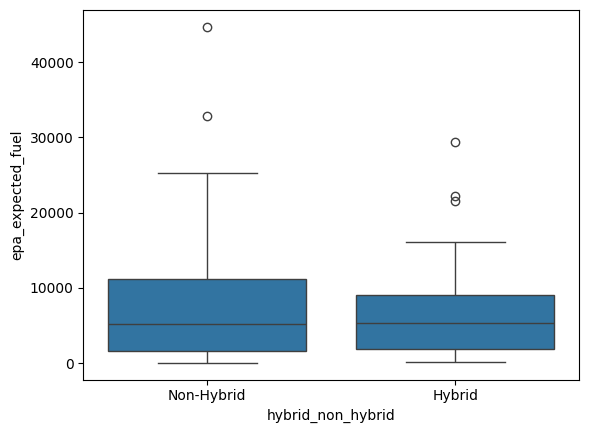

In [21]:
sns.boxplot(x='hybrid_non_hybrid', y='epa_expected_fuel', data=df_filtered)

<Axes: xlabel='hybrid_non_hybrid', ylabel='total_actual_fuel'>

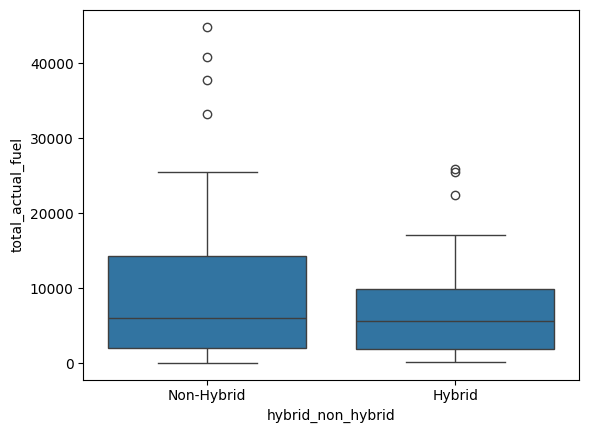

In [22]:
sns.boxplot(x='hybrid_non_hybrid', y='total_actual_fuel', data=df_filtered)

<Axes: xlabel='hybrid_non_hybrid', ylabel='total_actual_miles'>

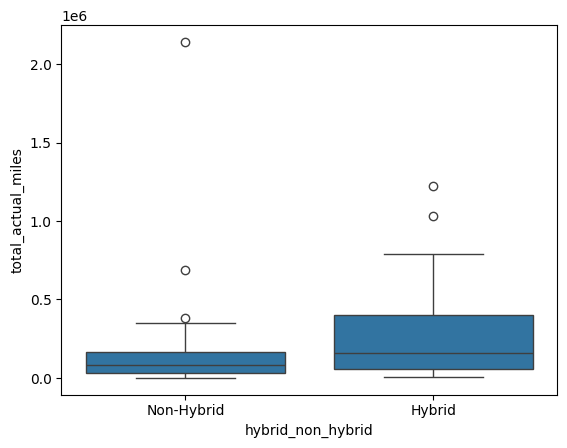

In [23]:
sns.boxplot(x='hybrid_non_hybrid', y='total_actual_miles', data=df_filtered)

<Axes: xlabel='hybrid_non_hybrid', ylabel='actual_fuel_economy_geotab'>

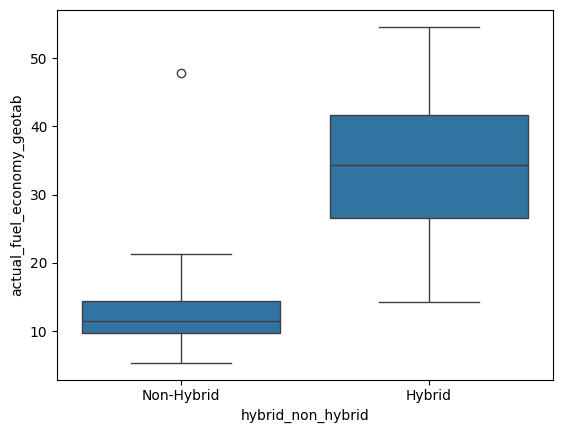

In [24]:
sns.boxplot(x='hybrid_non_hybrid', y='actual_fuel_economy_geotab', data=df_filtered)

<Axes: xlabel='hybrid_non_hybrid', ylabel='percent_difference_actual'>

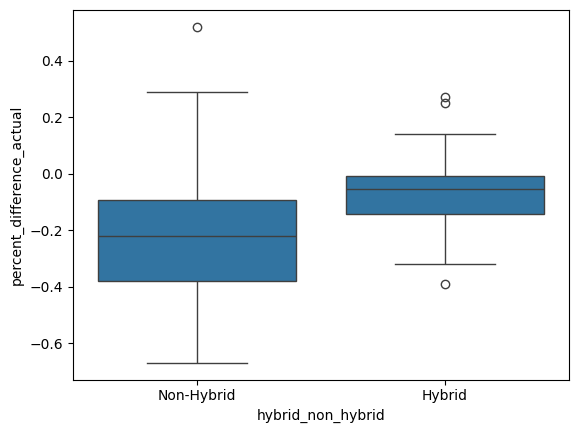

In [25]:
sns.boxplot(x='hybrid_non_hybrid', y='percent_difference_actual', data=df_filtered)

<Axes: xlabel='standard_type', ylabel='epa_expected_fuel'>

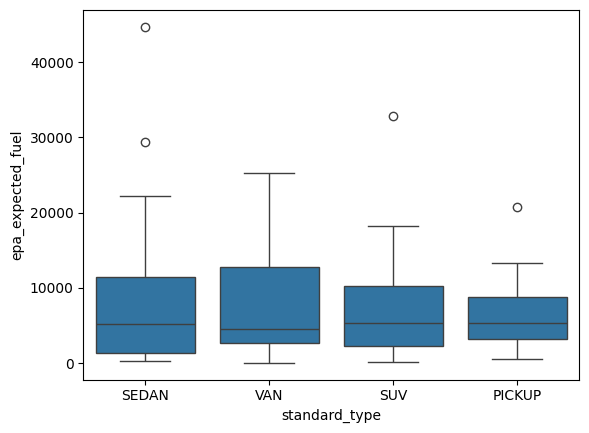

In [26]:
sns.boxplot(x='standard_type', y='epa_expected_fuel', data=df_filtered)

<Axes: xlabel='standard_type', ylabel='total_actual_fuel'>

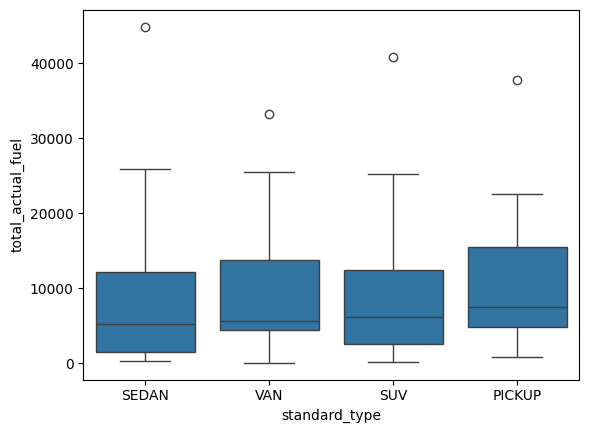

In [27]:
sns.boxplot(x='standard_type', y='total_actual_fuel', data=df_filtered)

<Axes: xlabel='standard_type', ylabel='total_actual_miles'>

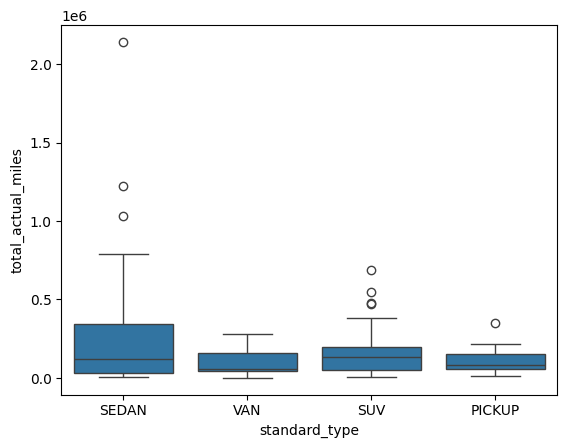

In [28]:
sns.boxplot(x='standard_type', y='total_actual_miles', data=df_filtered)

<Axes: xlabel='standard_type', ylabel='actual_fuel_economy_geotab'>

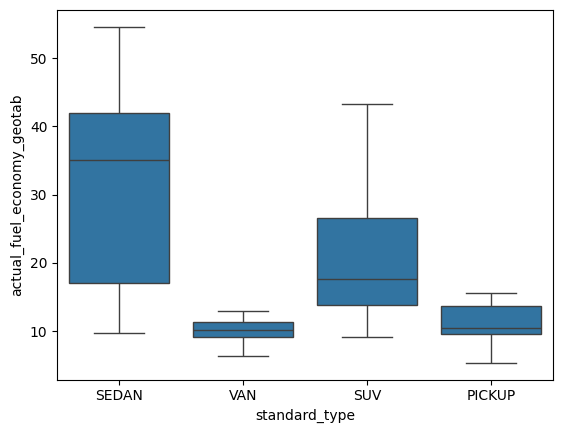

In [29]:
sns.boxplot(x='standard_type', y='actual_fuel_economy_geotab', data=df_filtered)

<Axes: xlabel='standard_type', ylabel='percent_difference_actual'>

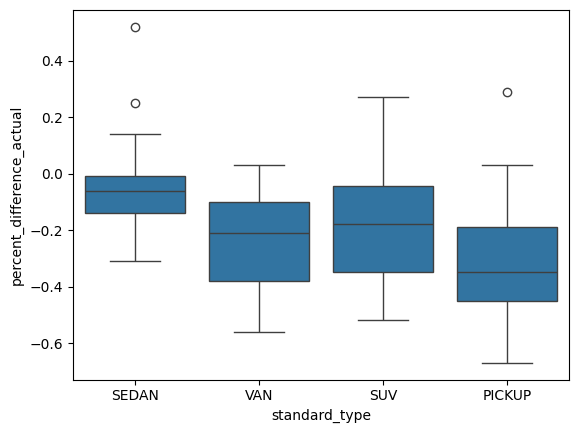

In [30]:
sns.boxplot(x='standard_type', y='percent_difference_actual', data=df_filtered)

<Axes: xlabel='make', ylabel='epa_expected_fuel'>

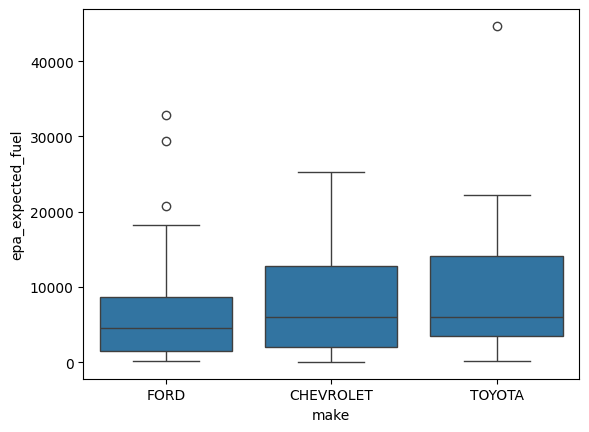

In [31]:
sns.boxplot(x='make', y='epa_expected_fuel', data=df_filtered)

<Axes: xlabel='make', ylabel='total_actual_fuel'>

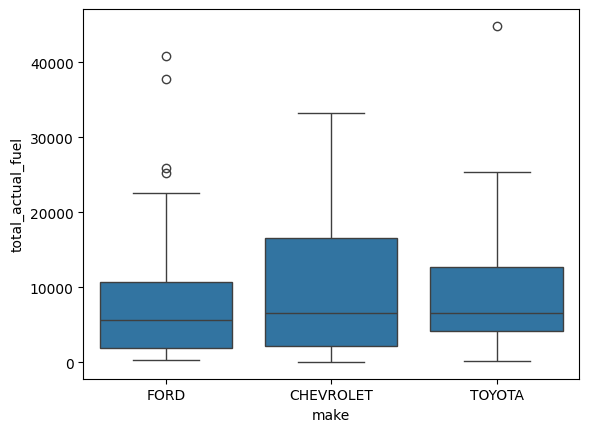

In [32]:
sns.boxplot(x='make', y='total_actual_fuel', data = df_filtered) 

<Axes: xlabel='make', ylabel='total_actual_miles'>

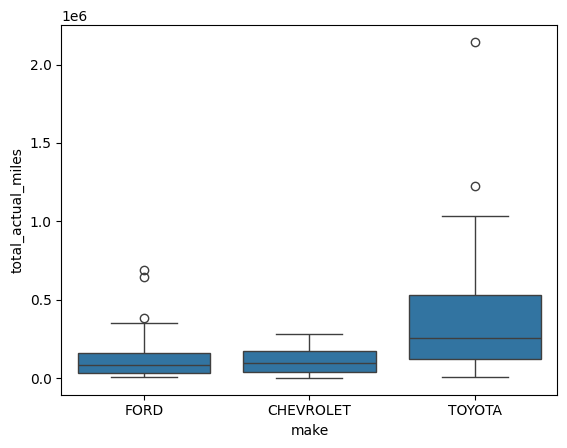

In [33]:
sns.boxplot(x='make', y='total_actual_miles', data = df_filtered) 

<Axes: xlabel='make', ylabel='actual_fuel_economy_geotab'>

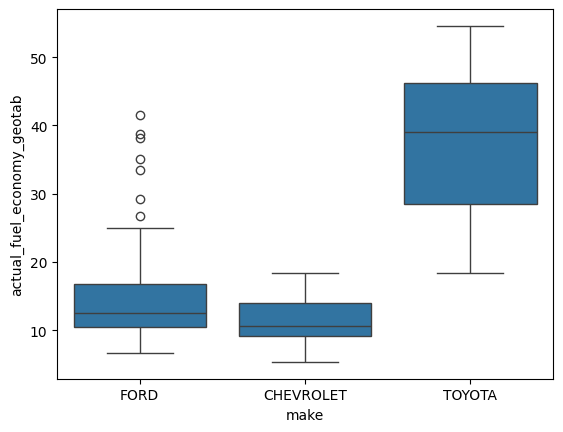

In [34]:
sns.boxplot(x='make', y='actual_fuel_economy_geotab', data=df_filtered)

<Axes: xlabel='make', ylabel='percent_difference_actual'>

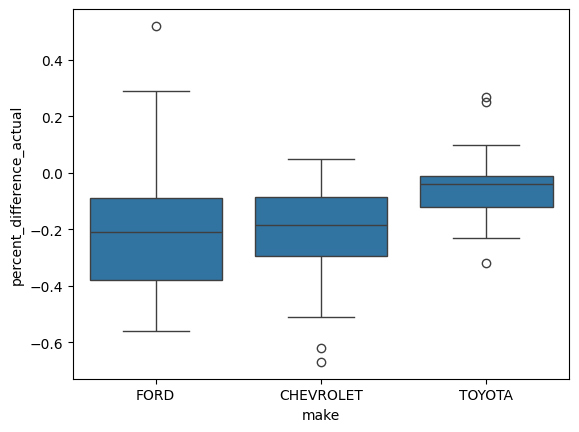

In [35]:
sns.boxplot(x='make', y='percent_difference_actual', data=df_filtered)

** Scatter plot:

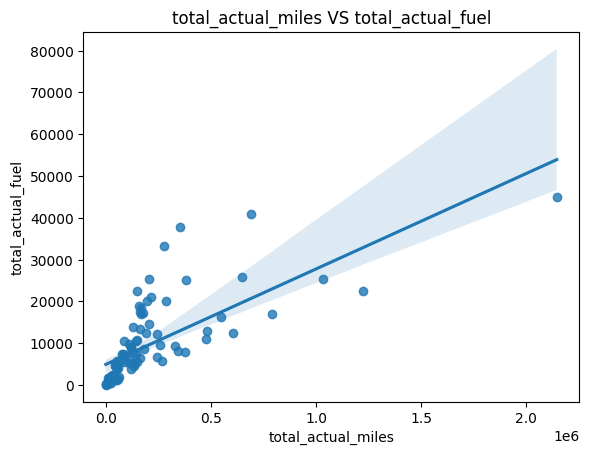

In [36]:
sns.regplot(x=df_filtered[['total_actual_miles']], y=df_filtered[['total_actual_fuel']])
plt.title("total_actual_miles VS total_actual_fuel")
plt.xlabel("total_actual_miles")
plt.ylabel("total_actual_fuel")
plt.show()

** Data Normalization:

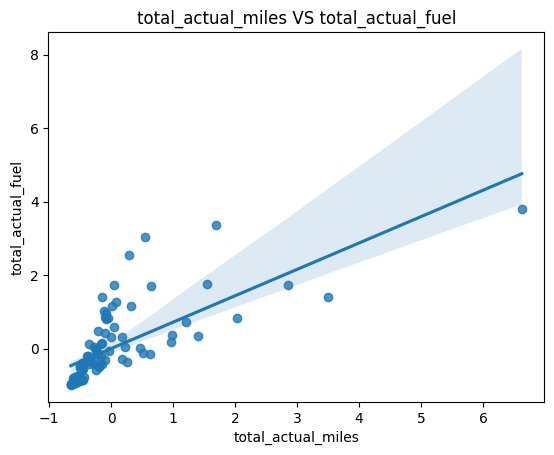

In [37]:
df_filtered[['total_actual_miles']]= (df_filtered[['total_actual_miles']]-df_filtered[['total_actual_miles']].mean())/df_filtered[['total_actual_miles']].std()
df_filtered[['total_actual_fuel']]= (df_filtered[['total_actual_fuel']]-df_filtered[['total_actual_fuel']].mean())/df_filtered[['total_actual_fuel']].std()

sns.regplot(x=df_filtered[['total_actual_miles']], y=df_filtered[['total_actual_fuel']])
plt.title("total_actual_miles VS total_actual_fuel")
plt.xlabel("total_actual_miles")
plt.ylabel("total_actual_fuel")
plt.show()

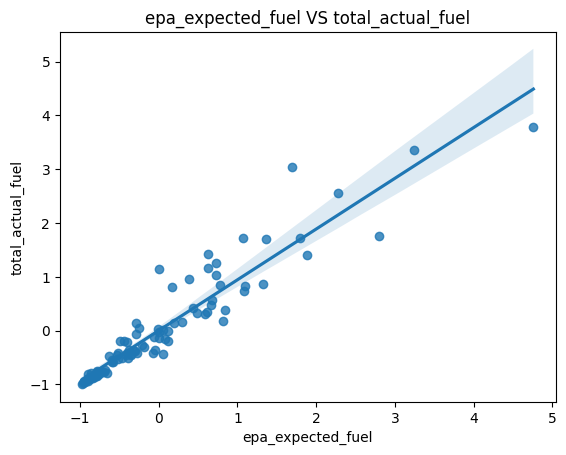

In [38]:
df_filtered[['epa_expected_fuel']]= (df_filtered[['epa_expected_fuel']]-df_filtered[['epa_expected_fuel']].mean())/df_filtered[['epa_expected_fuel']].std()
df_filtered[['total_actual_fuel']]= (df_filtered[['total_actual_fuel']]-df_filtered[['total_actual_fuel']].mean())/df_filtered[['total_actual_fuel']].std()

sns.regplot(x=df_filtered[['epa_expected_fuel']], y=df_filtered[['total_actual_fuel']]) # how the EPA predicted values matched actual data
plt.title("epa_expected_fuel VS total_actual_fuel")
plt.xlabel("epa_expected_fuel")
plt.ylabel("total_actual_fuel")
plt.show()

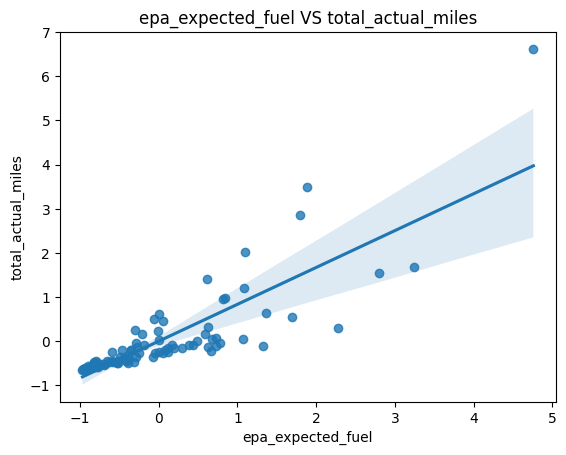

In [39]:
df_filtered[['epa_expected_fuel']]= (df_filtered[['epa_expected_fuel']]-df_filtered[['epa_expected_fuel']].mean())/df_filtered[['epa_expected_fuel']].std()
df_filtered[['total_actual_miles']]= (df_filtered[['total_actual_miles']]-df_filtered[['total_actual_miles']].mean())/df_filtered[['total_actual_miles']].std()


sns.regplot(x=df_filtered[['epa_expected_fuel']], y=df_filtered[['total_actual_miles']]) # how the EPA predicted values matched actual data
plt.title("epa_expected_fuel VS total_actual_miles")
plt.xlabel("epa_expected_fuel")
plt.ylabel("total_actual_miles")
plt.show()

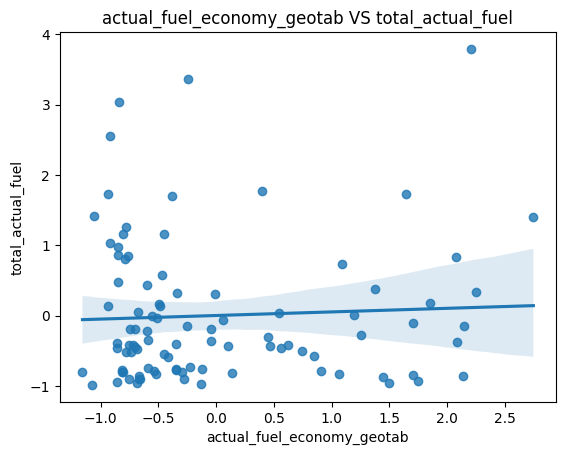

In [40]:
df_filtered[['actual_fuel_economy_geotab']]= (df_filtered[['actual_fuel_economy_geotab']]-df_filtered[['actual_fuel_economy_geotab']].mean())/df_filtered[['actual_fuel_economy_geotab']].std()
df_filtered[['total_actual_fuel']]= (df_filtered[['total_actual_fuel']]-df_filtered[['total_actual_fuel']].mean())/df_filtered[['total_actual_fuel']].std()


sns.regplot(x=df_filtered[['actual_fuel_economy_geotab']], y=df_filtered[['total_actual_fuel']]) 
plt.title("actual_fuel_economy_geotab VS total_actual_fuel")
plt.xlabel("actual_fuel_economy_geotab")
plt.ylabel("total_actual_fuel")
plt.show()

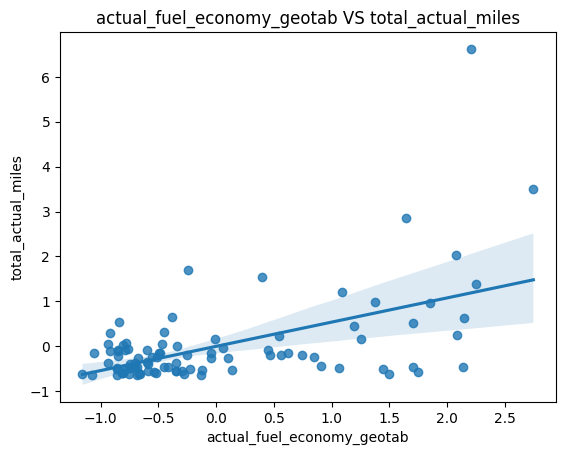

In [41]:
df_filtered[['actual_fuel_economy_geotab']]= (df_filtered[['actual_fuel_economy_geotab']]-df_filtered[['actual_fuel_economy_geotab']].mean())/df_filtered[['actual_fuel_economy_geotab']].std()
df_filtered[['total_actual_miles']]= (df_filtered[['total_actual_miles']]-df_filtered[['total_actual_miles']].mean())/df_filtered[['total_actual_miles']].std()


sns.regplot(x=df_filtered[['actual_fuel_economy_geotab']], y=df_filtered[['total_actual_miles']]) 
plt.title("actual_fuel_economy_geotab VS total_actual_miles")
plt.xlabel("actual_fuel_economy_geotab")
plt.ylabel("total_actual_miles")
plt.show()

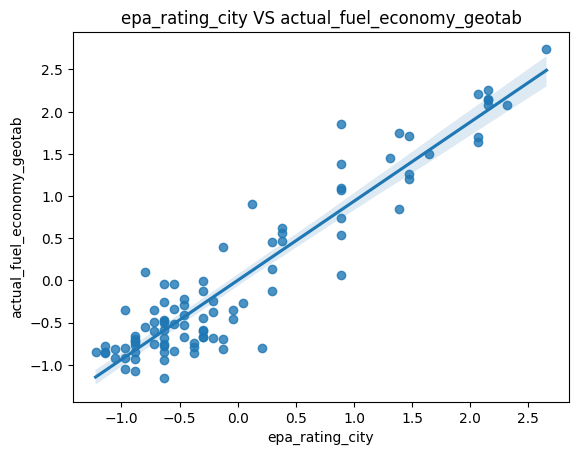

In [42]:
df_filtered[['epa_rating_city']]= (df_filtered[['epa_rating_city']]-df_filtered[['epa_rating_city']].mean())/df_filtered[['epa_rating_city']].std()
df_filtered[['actual_fuel_economy_geotab']]= (df_filtered[['actual_fuel_economy_geotab']]-df_filtered[['actual_fuel_economy_geotab']].mean())/df_filtered[['actual_fuel_economy_geotab']].std()


sns.regplot(x=df_filtered[['epa_rating_city']], y=df_filtered[['actual_fuel_economy_geotab']]) # how the EPA predicted values matched actual data
plt.title("epa_rating_city VS actual_fuel_economy_geotab")
plt.xlabel("epa_rating_city")
plt.ylabel("actual_fuel_economy_geotab")
plt.show()

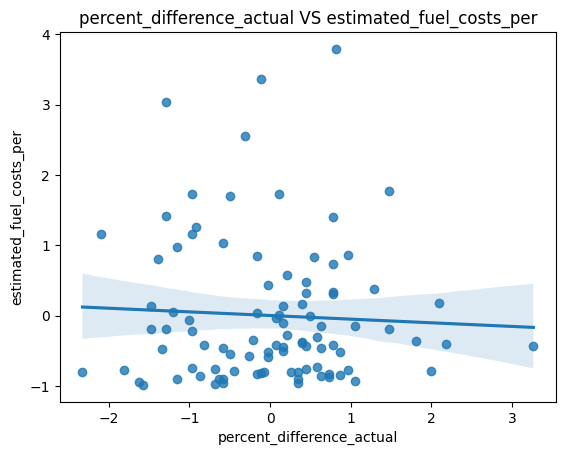

In [43]:
df_filtered[['percent_difference_actual']]= (df_filtered[['percent_difference_actual']]-df_filtered[['percent_difference_actual']].mean())/df_filtered[['percent_difference_actual']].std()
df_filtered[['estimated_fuel_costs_per']]= (df_filtered[['estimated_fuel_costs_per']]-df_filtered[['estimated_fuel_costs_per']].mean())/df_filtered[['estimated_fuel_costs_per']].std()


sns.regplot(x=df_filtered[['percent_difference_actual']], y=df_filtered[['estimated_fuel_costs_per']]) # how the EPA predicted values matched actual data
plt.title("percent_difference_actual VS estimated_fuel_costs_per")
plt.xlabel("percent_difference_actual")
plt.ylabel("estimated_fuel_costs_per")
plt.show()

### Correlation analysis

*Year on vehicles did not have any correlation with other variables.*

In [278]:
numeric_df = df_filtered.select_dtypes(include=['number'])
numeric_df.corr()

,year,epa_rating_city,vehicle_count,total_actual_miles,total_actual_fuel,epa_expected_fuel,actual_fuel_economy_geotab,percent_difference_actual,estimated_fuel_costs_per,fuel_costs_per_mile
year,1.000000,-0.188094,0.072232,0.104457,0.318762,0.293223,-0.123172,0.061365,0.318762,0.102366
epa_rating_city,-0.188094,1.000000,0.514246,0.517798,0.060721,0.147230,0.938164,0.219248,0.060721,-0.781930
vehicle_count,0.072232,0.514246,1.000000,0.893011,0.611382,0.725831,0.509644,0.150464,0.611382,-0.358781
total_actual_miles,0.104457,0.517798,0.893011,1.000000,0.718588,0.834506,0.539305,0.216855,0.718588,-0.386698
total_actual_fuel,0.318762,0.060721,0.611382,0.718588,1.000000,0.943296,0.051079,-0.051743,1.000000,0.048673
epa_expected_fuel,0.293223,0.147230,0.725831,0.834506,0.943296,1.000000,0.209376,0.190005,0.943296,-0.123199
actual_fuel_economy_geotab,-0.123172,0.938164,0.509644,0.539305,0.051079,0.209376,1.000000,0.524125,0.051079,-0.868808
percent_difference_actual,0.061365,0.219248,0.150464,0.216855,-0.051743,0.190005,0.524125,1.000000,-0.051743,-0.634520
estimated_fuel_costs_per,0.318762,0.060721,0.611382,0.718588,1.000000,0.943296,0.051079,-0.051743,1.000000,0.048673
fuel_costs_per_mile,0.102366,-0.781930,-0.358781,-0.386698,0.048673,-0.123199,-0.868808,-0.634520,0.048673,1.000000


In [279]:
numeric_df = df_filtered.select_dtypes(include=['number']).drop(df[['year']], axis=1)
numeric_df.corr()

,epa_rating_city,vehicle_count,total_actual_miles,total_actual_fuel,epa_expected_fuel,actual_fuel_economy_geotab,percent_difference_actual,estimated_fuel_costs_per,fuel_costs_per_mile
epa_rating_city,1.000000,0.514246,0.517798,0.060721,0.147230,0.938164,0.219248,0.060721,-0.781930
vehicle_count,0.514246,1.000000,0.893011,0.611382,0.725831,0.509644,0.150464,0.611382,-0.358781
total_actual_miles,0.517798,0.893011,1.000000,0.718588,0.834506,0.539305,0.216855,0.718588,-0.386698
total_actual_fuel,0.060721,0.611382,0.718588,1.000000,0.943296,0.051079,-0.051743,1.000000,0.048673
epa_expected_fuel,0.147230,0.725831,0.834506,0.943296,1.000000,0.209376,0.190005,0.943296,-0.123199
actual_fuel_economy_geotab,0.938164,0.509644,0.539305,0.051079,0.209376,1.000000,0.524125,0.051079,-0.868808
percent_difference_actual,0.219248,0.150464,0.216855,-0.051743,0.190005,0.524125,1.000000,-0.051743,-0.634520
estimated_fuel_costs_per,0.060721,0.611382,0.718588,1.000000,0.943296,0.051079,-0.051743,1.000000,0.048673
fuel_costs_per_mile,-0.781930,-0.358781,-0.386698,0.048673,-0.123199,-0.868808,-0.634520,0.048673,1.000000


In [281]:
pearson_coef, p_value= stats.pearsonr(df_filtered['epa_expected_fuel'], df_filtered['total_actual_fuel'])
print('The Pearson Correlation is:', pearson_coef, 'and the P-value:', p_value)

The Pearson Correlation is: 0.943296044446026 and the P-value: 2.5200071584266164e-46


In [282]:
df_filtered.head()

,year,make,model,hybrid_non_hybrid,standard_type,epa_rating_city,vehicle_count,total_actual_miles,total_actual_fuel,epa_expected_fuel,actual_fuel_economy_geotab,percent_difference_actual,estimated_fuel_costs_per,fuel_costs_per_mile
1,2008,FORD,CROWN VIC,Non-Hybrid,SEDAN,-1.053211,7,-0.590914,-0.803196,-0.771699,-0.812112,0.258293,-0.803196,0.26
2,2008,CHEVROLET,EXPRESS,Non-Hybrid,VAN,-0.884626,1,-0.647693,-0.985101,-0.967755,-1.076821,-1.574996,-0.985101,0.39
3,2008,FORD,FOCUS,Non-Hybrid,SEDAN,0.042590,49,-0.604772,-0.907477,-0.901953,-0.273185,-0.634848,-0.907477,0.15
4,2008,FORD,FUSION,Non-Hybrid,SEDAN,-0.463164,5,-0.549149,-0.798718,-0.761730,-0.291413,0.352308,-0.798718,0.15
5,2008,TOYOTA,HIGHLANDER HYBRID,Hybrid,SUV,0.295467,15,-0.526731,-0.814286,-0.800346,0.135766,-0.117766,-0.814286,0.12


### Chi_Square tests on categorical variables "make", "hybrid_non_hybrid", and "standard_type" 
### *against*
###  binned numerical variables:

In [283]:
# Define binns for numerical value
df_filtered['diff_group'] = pd.cut(
    df_filtered['epa_expected_fuel'],
    bins=5, 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

contingency_table = pd.crosstab(df_filtered['make'], df_filtered['diff_group'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('chi_sqaure:', chi2)
print('Degree of Freedom:', dof)
print('P-value:', p)
print("Expected Frequencies:", expected)

chi_sqaure: 7.9515051007588315
Degree of Freedom: 8
P-value: 0.43822156669182966
Expected Frequencies: [[12.69473684  3.6         1.13684211  0.37894737  0.18947368]
 [38.78947368 11.          3.47368421  1.15789474  0.57894737]
 [15.51578947  4.4         1.38947368  0.46315789  0.23157895]]


In [284]:
# Define binns for numerical value
df_filtered['diff_group'] = pd.cut(
    df_filtered['actual_fuel_economy_geotab'],
    bins=5, 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)
contingency_table = pd.crosstab(df_filtered['make'], df_filtered['diff_group'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('chi_sqaure:', chi2)
print('Degree of Freedom:', dof)
print('P-value:', p)
print("Expected Frequencies:", expected)

chi_sqaure: 62.13383838383839
Degree of Freedom: 8
P-value: 1.7746812002406068e-10
Expected Frequencies: [[ 9.47368421  3.41052632  1.89473684  1.89473684  1.32631579]
 [28.94736842 10.42105263  5.78947368  5.78947368  4.05263158]
 [11.57894737  4.16842105  2.31578947  2.31578947  1.62105263]]


In [285]:
# Define binns for numerical value
df_filtered['diff_group'] = pd.cut(
    df_filtered['percent_difference_actual'],
    bins=5, 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

contingency_table = pd.crosstab(df_filtered['make'], df_filtered['diff_group'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('chi_sqaure:', chi2)
print('Degree of Freedom:', dof)
print('P-value:', p)
print("Expected Frequencies:", expected)

chi_sqaure: 14.097901032266236
Degree of Freedom: 8
P-value: 0.07924908135340218
Expected Frequencies: [[ 2.27368421  5.49473684  8.33684211  1.51578947  0.37894737]
 [ 6.94736842 16.78947368 25.47368421  4.63157895  1.15789474]
 [ 2.77894737  6.71578947 10.18947368  1.85263158  0.46315789]]


In [287]:
# Define binns for numerical value
df_filtered['diff_group'] = pd.cut(
    df_filtered['epa_expected_fuel'],
    bins=5, 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

contingency_table = pd.crosstab(df_filtered['hybrid_non_hybrid'], df_filtered['diff_group'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('chi_sqaure:', chi2)
print('Degree of Freedom:', dof)
print('P-value:', p)
print("Expected Frequencies:", expected)

chi_sqaure: 1.3453503810313516
Degree of Freedom: 4
P-value: 0.8536355478075986
Expected Frequencies: [[22.56842105  6.4         2.02105263  0.67368421  0.33684211]
 [44.43157895 12.6         3.97894737  1.32631579  0.66315789]]


In [288]:
# Define binns for numerical value
df_filtered['diff_group'] = pd.cut(
    df_filtered['actual_fuel_economy_geotab'],
    bins=5, 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)


contingency_table = pd.crosstab(df_filtered['hybrid_non_hybrid'], df_filtered['diff_group'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('chi_sqaure:', chi2)
print('Degree of Freedom:', dof)
print('P-value:', p)
print("Expected Frequencies:", expected)

chi_sqaure: 70.60987496850592
Degree of Freedom: 4
P-value: 1.6874315306887293e-14
Expected Frequencies: [[16.84210526  6.06315789  3.36842105  3.36842105  2.35789474]
 [33.15789474 11.93684211  6.63157895  6.63157895  4.64210526]]


In [289]:
# Define binns for numerical value
df_filtered['diff_group'] = pd.cut(
    df_filtered['percent_difference_actual'],
    bins=5, 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

contingency_table = pd.crosstab(df_filtered['hybrid_non_hybrid'], df_filtered['diff_group'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('chi_sqaure:', chi2)
print('Degree of Freedom:', dof)
print('P-value:', p)
print("Expected Frequencies:", expected)

chi_sqaure: 16.161551047731006
Degree of Freedom: 4
P-value: 0.002809873189961995
Expected Frequencies: [[ 4.04210526  9.76842105 14.82105263  2.69473684  0.67368421]
 [ 7.95789474 19.23157895 29.17894737  5.30526316  1.32631579]]


In [291]:
# Define binns for numerical value
df_filtered['diff_group'] = pd.cut(
    df_filtered['epa_expected_fuel'],
    bins=5, 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

contingency_table = pd.crosstab(df_filtered['standard_type'], df_filtered['diff_group'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('chi_sqaure:', chi2)
print('Degree of Freedom:', dof)
print('P-value:', p)
print("Expected Frequencies:", expected)

chi_sqaure: 5.234852012515419
Degree of Freedom: 12
P-value: 0.9496710367935373
Expected Frequencies: [[10.57894737  3.          0.94736842  0.31578947  0.15789474]
 [20.45263158  5.8         1.83157895  0.61052632  0.30526316]
 [21.15789474  6.          1.89473684  0.63157895  0.31578947]
 [14.81052632  4.2         1.32631579  0.44210526  0.22105263]]


actual_fuel_economy_geotab and percent_difference_actual significant for standard type too.

In [292]:
# Define binns for numerical value
df_filtered['diff_group'] = pd.cut(
    df_filtered['actual_fuel_economy_geotab'],
    bins=5, 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

contingency_table = pd.crosstab(df_filtered['standard_type'], df_filtered['diff_group'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('chi_sqaure:', chi2)
print('Degree of Freedom:', dof)
print('P-value:', p)
print("Expected Frequencies:", expected)

chi_sqaure: 67.52934865900383
Degree of Freedom: 12
P-value: 9.257529211069714e-10
Expected Frequencies: [[ 7.89473684  2.84210526  1.57894737  1.57894737  1.10526316]
 [15.26315789  5.49473684  3.05263158  3.05263158  2.13684211]
 [15.78947368  5.68421053  3.15789474  3.15789474  2.21052632]
 [11.05263158  3.97894737  2.21052632  2.21052632  1.54736842]]


In [293]:
# Define binns for numerical value
df_filtered['diff_group'] = pd.cut(
    df_filtered['percent_difference_actual'],
    bins=5, 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

contingency_table = pd.crosstab(df_filtered['standard_type'], df_filtered['diff_group'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('chi_sqaure:', chi2)
print('Degree of Freedom:', dof)
print('P-value:', p)
print("Expected Frequencies:", expected)

chi_sqaure: 29.245997429707298
Degree of Freedom: 12
P-value: 0.003621656420394028
Expected Frequencies: [[ 1.89473684  4.57894737  6.94736842  1.26315789  0.31578947]
 [ 3.66315789  8.85263158 13.43157895  2.44210526  0.61052632]
 [ 3.78947368  9.15789474 13.89473684  2.52631579  0.63157895]
 [ 2.65263158  6.41052632  9.72631579  1.76842105  0.44210526]]


## Model Development and Evaluation:

In [ ]:
%pip install -U scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [407]:
x= df_filtered[['total_actual_fuel']]
y= df_filtered['epa_expected_fuel']

lm= LinearRegression()

lm.fit(x,y)
yhat= lm.predict(x)

In [409]:
intercept= lm.intercept_
intercept

np.float64(1.3692532747668592e-17)

In [410]:
slope= lm.coef_
slope

array([0.94329604])

**In-sample evaluation:**

In [386]:
score= lm.score(x,y)
mean_squared_error= mean_squared_error(x,y)

print('The mean-squared_ error is:', mean_squared_error, 'and R^2 is:', score)

The mean-squared_ error is: 0.11221414362260093 and R^2 is: 0.8898074274675193


**Based on graph below: Variance had increased with increasing the total_actual_fuel, which means Simple linear model in not a good model.**

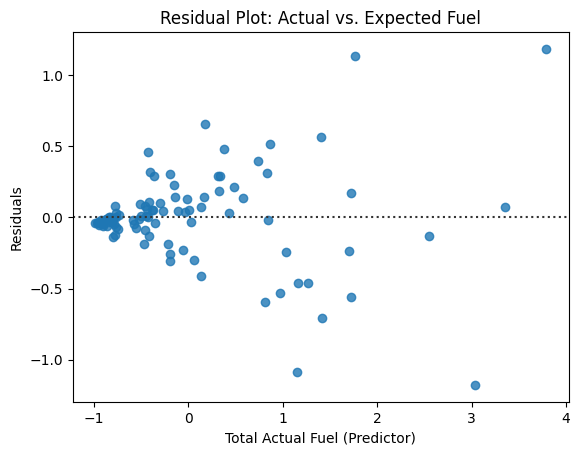

In [387]:
sns.residplot(x=df_filtered['total_actual_fuel'], y=df_filtered['epa_expected_fuel'])

plt.title('Residual Plot: Actual vs. Expected Fuel')
plt.xlabel('Total Actual Fuel (Predictor)')
plt.ylabel('Residuals')
plt.show()



C:\Users\marzs\AppData\Local\Temp\ipykernel_8284\1061634244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(df_filtered['epa_expected_fuel'], hist=False, color="r", label="Actual value")
C:\Users\marzs\AppData\Local\Temp\ipykernel_8284\1061634244.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

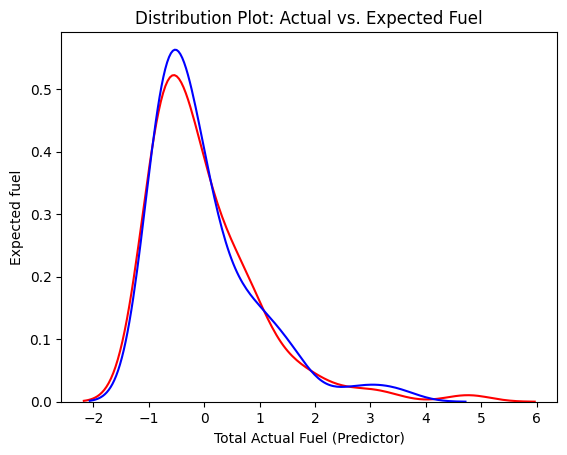

In [411]:
ax1= sns.distplot(df_filtered['epa_expected_fuel'], hist=False, color="r", label="Actual value")

sns.distplot(yhat, hist=False, color="b", label="Fitted values", ax=ax1)

plt.title('Distribution Plot: Actual vs. Expected Fuel')
plt.xlabel('Total Actual Fuel (Predictor)')
plt.ylabel('Expected fuel')
plt.show()

### Model Evaluation with different train/test sets for Single Linear Regression:

In [412]:
X= df_filtered[['total_actual_fuel']]
y_data= df_filtered['epa_expected_fuel']

x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.25, random_state=1)
print('The training samples is:', x_train.shape[0])
print('The test set is:', x_test.shape[0])

The training samples is: 71
The test set is: 24


In [413]:
lre= LinearRegression()
lre.fit(x_train, y_train)
print(lre.score(x_train, y_train))
print(lre.score(x_test, y_test))
yhat=lre.predict(X)

0.8942257314155063
0.8740701758721587


In [414]:
Rcross= cross_val_score(lre, x_train, y_train, cv=4)
print('The mean of the folds are:', Rcross.mean(), 'and the standard deviation is:', Rcross.std())

The mean of the folds are: 0.831156014553085 and the standard deviation is: 0.09135009676742468


In [416]:
Rcross = cross_val_score(lre, X, y_data, cv=4)
print('The mean of the folds are:', Rcross.mean(), 'and the standard deviation is:', Rcross.std())

The mean of the folds are: 0.7973338537865219 and the standard deviation is: 0.19662878567652192


### Model Evaluation with different train/test sets for Multiple Linear Regression:

In [417]:
Z= df_filtered[['total_actual_miles','total_actual_fuel', 'actual_fuel_economy_geotab','percent_difference_actual']]
y_data= df_filtered['epa_expected_fuel']

x_train, x_test, y_train, y_test = train_test_split(Z, y_data, test_size=0.25, random_state=1)
print('The training samples is:', x_train.shape[0])
print('The test set is:', x_test.shape[0])

The training samples is: 71
The test set is: 24


In [418]:
lr4= LinearRegression()
lr4.fit(x_train, y_train)
print(lr4.score(x_train, y_train))
print(lr4.score(x_test, y_test))

yhat=lr4.predict(Z)

0.9788043836678989
0.9574669324835028


C:\Users\marzs\AppData\Local\Temp\ipykernel_8284\1522967513.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(y_data, hist=False, color="r", label="Actual value")
C:\Users\marzs\AppData\Local\Temp\ipykernel_8284\1522967513.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

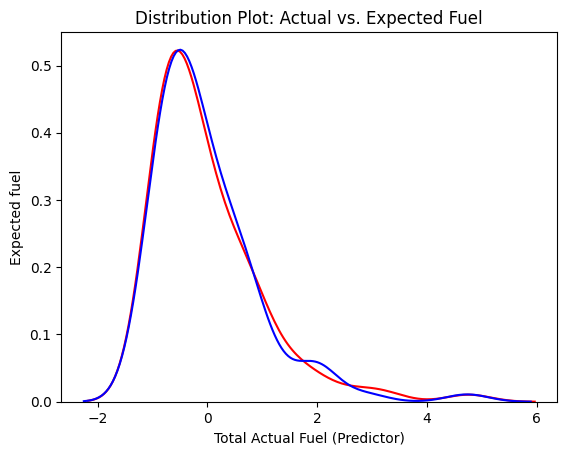

In [420]:
ax1= sns.distplot(y_data, hist=False, color="r", label="Actual value")

sns.distplot(yhat, hist=False, color="b", label="Fitted values", ax=ax1)

plt.title('Distribution Plot: Actual vs. Expected Fuel')
plt.xlabel('Total Actual Fuel (Predictor)')
plt.ylabel('Expected fuel')
plt.show()


In [421]:
Rcross= cross_val_score(lr4, x_train, y_train, cv=4)
print('The mean of the folds are:', Rcross.mean(), 'and the standard deviation is:', Rcross.std())

The mean of the folds are: 0.9641596569588031 and the standard deviation is: 0.013802950732241139


In [422]:
Rcross = cross_val_score(lr4, Z, y_data, cv=4)
print('The mean of the folds are:', Rcross.mean(), 'and the standard deviation is:', Rcross.std())

The mean of the folds are: 0.9478035643759999 and the standard deviation is: 0.023279754462347833
